In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gd
import seaborn as sns
%matplotlib inline

np.random.seed(7)
df=pd.read_csv("data.csv")

Check if the data are unbalanced

In [2]:
print( "Class 0: %d\nClass 1: %d" % ( (df["Class"]==0).sum(), (df["Class"]==1).sum() ) )

Class 0: 284315
Class 1: 492


They are extremely unbalanced! I decided to downsample class 0 (non-fraud transactions)

In [3]:
fr0 = df[df["Class"] == 0].sample( n=492 ).copy()
fr1 = df[df["Class"] == 1].copy()

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Let's check how many of given "V" features are important:

/home/pawel/anaconda3/envs/fraud_detection/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


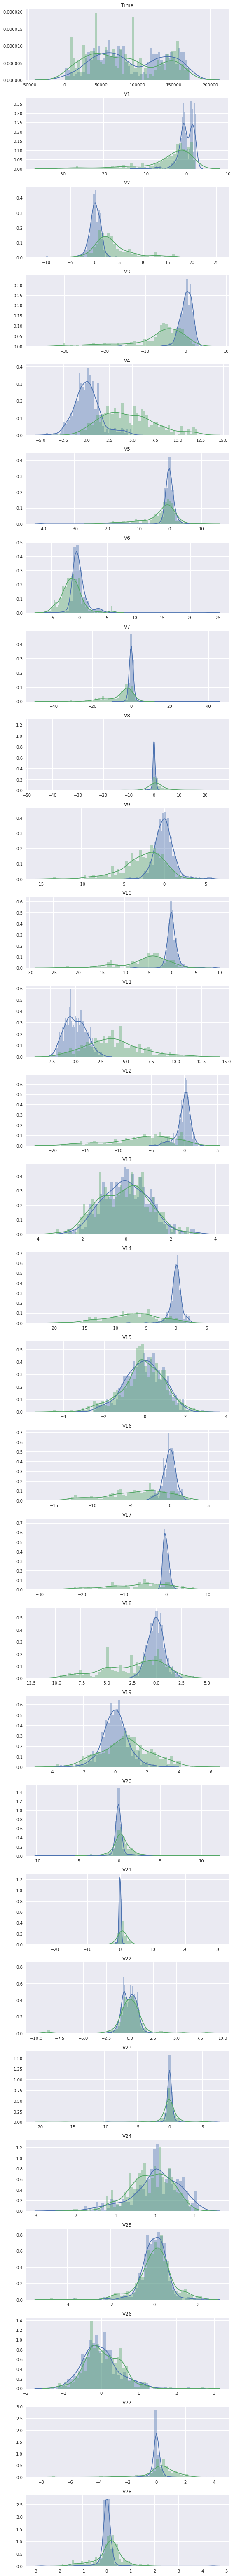

In [18]:
plt.figure(figsize=(8,29*3))
grid = gd.GridSpec(29, 1)

ax = plt.subplot( grid[0] )
sns.distplot( fr0["Time"], bins = 50 )
sns.distplot( fr1["Time"], bins = 50 )
ax.set_xlabel( '' )
ax.set_title( "Time" )

for i in range(1, 29):
    name = "V" + str(i)
    ax = plt.subplot( grid[i] )
    sns.distplot( fr0[name], bins=50 )
    sns.distplot( fr1[name], bins=50 )
    ax.set_xlabel('')
    ax.set_title( name )
    
plt.tight_layout()
plt.show()

Features Time, V13, V15, V24, V25 don't seem to be important in two-classes classification - we can drop them to make the life of predictive models a bit easier

In [8]:
drop_arr = [ "Time", "V13", "V15", "V24", "V25" ]
fr0.drop( drop_arr, 1, inplace = True )
fr1.drop( drop_arr, 1, inplace = True )

/home/pawel/anaconda3/envs/fraud_detection/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


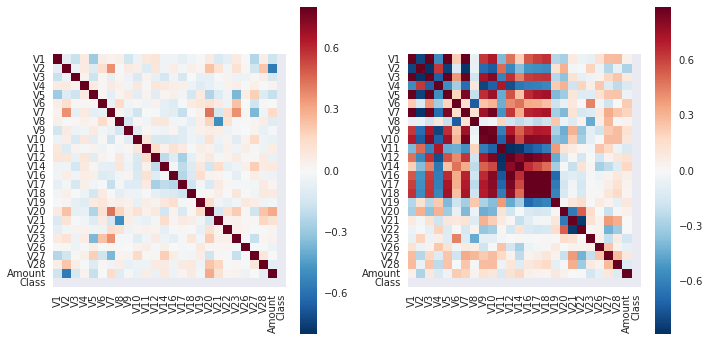

In [14]:
plt.figure(figsize=(2*5,5))

plt.subplot( gd.GridSpec(1, 2)[0] )
sns.heatmap( fr0.corr(), vmax=.8, square=True)

plt.subplot( gd.GridSpec(1, 2)[1] )
sns.heatmap( fr1.corr(), vmax=.8, square=True)

plt.tight_layout()
plt.show()